# Hypothesis Testing

In [16]:
# import relevant packages
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# filename of data:
data_filename = 'coursework_1_data_2019.csv'

In [27]:
# Get the data for per-capita of condition X:
data = pd.read_csv(data_filename)[['2013_cases_total','2018_cases_total','2013_pop_total','2018_pop_total']]

# Looking at the first few rows:
data.head()

,2013_cases_total,2018_cases_total,2013_pop_total,2018_pop_total
0,619,763,179030,181779
1,594,773,344062,355955
2,451,527,244010,257883
3,421,494,172975,189334
4,327,367,164807,170463


In [34]:
# Saving 2013 and 2018 separately:
data1 = data['2013_cases_total']/data['2013_pop_total']
data2 = data['2018_cases_total']/data['2018_pop_total']

data['2013_per_capita_cases'] = data1
data['2018_per_capita_cases'] = data2
# Saving some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:
data.describe()

,2013_cases_total,2018_cases_total,2013_pop_total,2018_pop_total,2013_per_capita_cases,2018_per_capita_cases
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,159.5132","1,278.6053","354,282.0921","368,289.4803",0.0032,0.0034
std,997.2310,"1,069.6920","278,874.4681","294,596.8620",0.0014,0.0014
min,1.0000,4.0000,"2,385.0000","2,440.0000",0.0004,0.0010
25%,531.7500,592.5000,"188,067.2500","193,428.5000",0.0023,0.0025
50%,794.5000,873.5000,"257,771.5000","264,203.5000",0.0030,0.0032
75%,"1,470.2500","1,641.5000","402,499.0000","409,428.5000",0.0038,0.0041
max,"5,582.0000","5,745.0000","1,528,154.0000","1,623,387.0000",0.0085,0.0087


<AxesSubplot:>

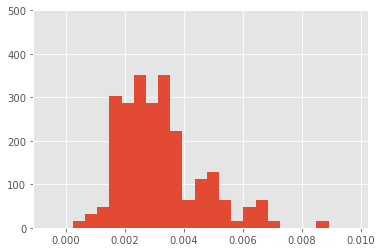

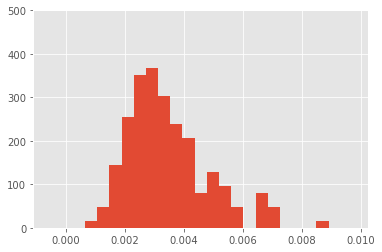

In [35]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
hist_min = (min(min1,min2)) - 0.001
hist_max = (max(max1,max2)) + 0.001
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0.000,500.000]

# Choose an appropriate number of columns for the histogram:
n_cols = hist_max - hist_min

# Now create the 2 plots:

plt.figure(1)
plt.ylim(y_range)
data['2013_per_capita_cases'].hist(range=x_range, bins=25, density=True)
##plt.savefig('2008_2013_pct_change_per_capita_ND.png')

plt.figure(2)
plt.ylim(y_range)
data['2018_per_capita_cases'].hist(range=x_range, bins=25, density=True)
##plt.savefig('2013_2018_pct_change_per_capita_ND.png')


In [55]:
# Test 1 - Mean Comparison Test
# Step 1
# H0: Mean of population 1 =  Mean of population 1 
#.....(Investments do not have any impact change of X)
# H1: Mean of population 1 <> Mean of population 1 
#.....(Investments do have an impact on change of X)

In [56]:
# Step 2
# Set significance level:

alpha = 0.05

In [57]:
# Step 3-4
# Using the built-in scipy.stats function (ttest_ind) that does steps 3 and 4.
# We can get to know whether we can assume that the samples are drawn...
# ... from populations with the same standard deviation or not.

std_ratio = std1/std2
print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 1.0027664481461027
Can assume equal population standard deviations.


In [58]:
# Calculate the test statistic and the p-value:

test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.13802291646844433


In [59]:
# Step 5
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.(Investments do have an impact on change of X)")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.(Investments do not have any impact on change of X)")

p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.(Investments do not have any impact on change of X)


In [60]:
# Test 2 - KS Distribution Test
# Step 1
# H0: Sample 1 and Sample 2 are drawn from identical distributions.(Investments do not have any impact on change of X)
# H1: Sample 1 and Sample 2 are not drawn from identical distributions.(Investments do have an impact on change of X)

In [61]:
# Step 2
# Set significance level:

alpha = 0.05

In [62]:
# Step 3-4
# Using the built-in scipy.stats function (ks_2samp) that does steps 3 and 4:

KS_stat, p_value = sps.ks_2samp(data1,data2)

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.13157894736842105
p-value = 0.1440340045079191


In [63]:
# Step 5
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.(Investments do have an impact on change of X)")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.(Investments do not have any impact on change of X)")

p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same distribution.(Investments do not have any impact on change of X)
